In [1]:


url = 'https://raw.githubusercontent.com/ArthurMSousa/Projeto-de-Visualiza-o/main/Twitchdata.csv'



In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import squarify
import numpy as np

In [9]:
df = pd.read_csv(url, )

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [8]:
df.rename(columns={'Channel':'Canal','Watch time(Minutes)':'Tempo assistido em minutos','Stream time(minutes)':'Tempo de transmissão em minutos','Peak viewers':'Pico de espectadores','Average viewers':'Média de visualizações','Followers':'Seguidores do canal','Followers gained':'Seguidores recebidos','Views gained':'Visualizações recebidas','Partnered':'Parceiro da twitch','Mature':'Conteúdo adulto','Language':'Idioma'}, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [12]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [21]:
dados_de_minutagem = df.groupby(['Channel'])['Stream time(minutes)'].sum().nlargest(8).reset_index()

In [20]:
dados_de_minutagem.head()

,Channel,Stream time(minutes)
0,RiffTrax,521445
1,RelaxBeats,521430
2,Monstercat,519675
3,RocketBeansTV,518415
4,SaltyTeemo,517980


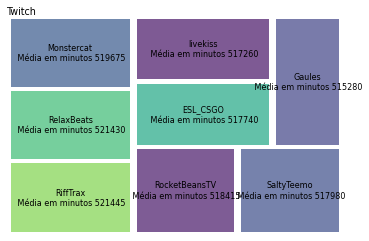

In [30]:
volume = dados_de_minutagem['Stream time(minutes)']
labels = dados_de_minutagem['Channel']

l =[]
for index in range(len(labels)):
    l.append(labels[index]+"\n Média em minutos "+str(volume[index]))

plt.rc('font', size=8)
squarify.plot(sizes=volume, label=l, pad=True,
               alpha=0.7)
plt.axis('off')
plt.title("Twitch", pad=True, loc='left')
plt.show()